<a href="https://colab.research.google.com/github/johnziebro/machine-learning-elytix/blob/main/visualizing_machine_learning_model_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Machine Learning Model Accuracy

When working with machine learning models, the ability to interpret which hyper-parameters create the most accurate model is important. For a simple, quick illustration on how to visualize a model's complexity I will use [seaborn](https://seaborn.pydata.org/), a graphing library, to show the accuracy of differing hyperparameters for a [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).

Ultimately, something like sklearn.model_selection's [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#), which brute-force tests all hyperparameters, can provide optimum results. However, for simplicity's sake, we will simply iterate over increasing numbers of nearest neighbors. A prepossessed dataset of telecom churn will be used with the 'churn' column as the target designating turnover.

First quietly install the required Python third party modules and import them.

In [ ]:
# install third-party modules quietly
!pip install numpy -q
!pip install pandas -q
!pip install seaborn -q
!pip install matplotlib -q
!pip install scikit-learn -q

In [ ]:
# import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

Next, set the seaborn theme and read the [CSV data from a Github Gist](https://gist.githubusercontent.com/johnziebro/1fbf5aa62eda5a7d6a299d65764d93e6/raw/941d13e7e169095976a0875250cc1f7e8b83ee29/churn.csv) into a Pandas dataframe:

In [ ]:
# set seaborn style
sns.set_theme(style="darkgrid")

# load data from Github gist
data_url = "https://gist.githubusercontent.com/johnziebro/1fbf5aa62eda5a7d6a299d65764d93e6/raw/941d13e7e169095976a0875250cc1f7e8b83ee29/churn.csv"
churn_df = pd.read_csv(data_url, index_col=0)
churn_df.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


To build the model and determine accuracy, the data will be split between the features which led to the churn as X, and the target churn result represented by y.

The data is then again randomly split into two sets of observations holding back a small percentage in order to test the accuracy of the fitted model.  We use sklearn's ubiquitous [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) to accomplish the split.

In [ ]:
# Import the module
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8740629685157422


Now the model will be fitted to the data using a K Nearest Neighbors classifier ranging from 1 to 12 neighbors. K Nearest Neighbors uses a number of similar observations to determine a prediction for previously unseen data. In simplified terms if a customer has similar usage features as other customers, it is likely their resulting churn will also be similar.

In [ ]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
 
print("Train Accuracies:", train_accuracies, '\n', "Test Accuracies:", test_accuracies)

Train Accuracies: {1: 1.0, 2: 0.9036009002250562, 3: 0.9114778694673669, 4: 0.8945986496624156, 5: 0.8953488372093024, 6: 0.8893473368342085, 7: 0.8885971492873218, 8: 0.8863465866466617, 9: 0.8870967741935484, 10: 0.8840960240060015, 11: 0.8874718679669917, 12: 0.8837209302325582} 
 Test Accuracies: {1: 0.7946026986506747, 2: 0.8605697151424287, 3: 0.8500749625187406, 4: 0.8695652173913043, 5: 0.8740629685157422, 6: 0.8650674662668666, 7: 0.8710644677661169, 8: 0.863568215892054, 9: 0.8725637181409296, 10: 0.8665667166416792, 11: 0.8710644677661169, 12: 0.8710644677661169}


Now create a seaborn friendly dataframe and determine the number of k nearest neighbors which produced the most accurate tests. Once we have the dataframe, we can us [panda's .idxmax() method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html) to return the first column index of the maximum value in the 'test_accuracies' row.

In [ ]:
# create DataFrame from accuracies
accuracies = pd.DataFrame(
    [train_accuracies, test_accuracies], 
    columns=neighbors, 
    index=['train accuracies', 'test accuracies']
)
accuracies

,1,2,3,4,5,6,7,8,9,10,11,12
train accuracies,1.000000,0.903601,0.911478,0.894599,0.895349,0.889347,0.888597,0.886347,0.887097,0.884096,0.887472,0.883721
test accuracies,0.794603,0.860570,0.850075,0.869565,0.874063,0.865067,0.871064,0.863568,0.872564,0.866567,0.871064,0.871064


In [ ]:
# determine the most accurate number of neighbors
most_accurate_neighbors_count = accuracies.loc["test accuracies"].idxmax(0)
most_accurate_neighbors_count

5

Finally, since we've trained and tested the KNN classifier with 1 to 12 neighbors and determined that 5 neighbors at 87.4% produce the most accurate results, we can graph the results of each of the iterations.

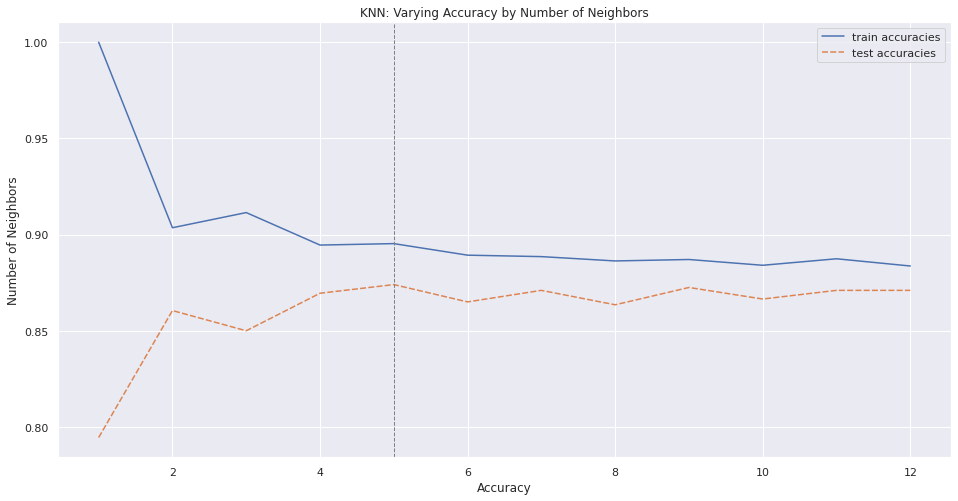

In [ ]:
# plot training accuracies
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)
sns.lineplot(data=accuracies.T, ax=ax)
ax.set(title='KNN: Varying Accuracy by Number of Neighbors', xlabel="Accuracy", ylabel="Number of Neighbors")

# add annotation
ax.axvline(most_accurate_neighbors_count, ls='--', linewidth=1, color='grey');